# Model Prediction: Decision Binary Classification Tree
#### Using the RPART library
In this model, we will be using a decision binary classification tree to predict whether a certain passenger made it off of the ship or not based on his characteristics. This model will be created based on the RPART algorithm and using the **classification error** impurity quantification method.

Next, we will compare these results to other results under the same model but using the other kinds of quantification methods:
* Gini index
* Entropy

## Classification Error Impurity Quantification Method
First we will quickly clean the data by removing columns that we found are not very statistically significant when it comes to the survival rate of the passenger.

In [27]:
# import libraries
library(rpart)
library(mlbench)
library(dplyr)

dat <- read.csv('datasets/train_edited.csv')
str(dat)

'data.frame':	889 obs. of  11 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 889 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 558 519 628 416 580 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 680 levels "110152","110413",..: 523 596 669 49 472 275 85 395 344 132 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


By looking at this description of the given dataset, we can see that we should not use **Name**s because of the great number of factors that it has. It considers every kind of name as a different factor.

Other columns that we can remove from the given dataset includes **Ticket** because of the insane amount of factors as well. 

In [28]:
dat <- dat %>% select(-Name, -Ticket)
str(dat)

'data.frame':	889 obs. of  9 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


As you can see from the above description, we have successfully removed both columns: **Name** and **Ticket**, since they wouldn't have been useful for us.

Now that we have removed the columns that we don't want, it's time to create our model using the rpart library.

In [32]:
fit <- rpart(Survived ~ Sex + Age + Fare + Embarked, data=dat, method="class")

Now to view the information about the classification tree that we just created, we can use the **summary()** function

In [35]:
summary(fit)

Call:
rpart(formula = Survived ~ Sex + Age + Fare + Embarked, data = dat, 
    method = "class")
  n= 889 

          CP nsplit rel error    xerror       xstd
1 0.44117647      0 1.0000000 1.0000000 0.04261827
2 0.02352941      1 0.5588235 0.5588235 0.03594890
3 0.01000000      2 0.5352941 0.5705882 0.03622125

Variable importance
 Sex  Age Fare 
  84    9    7 

Node number 1: 889 observations,    complexity param=0.4411765
  predicted class=0  expected loss=0.3824522  P(node) =1
    class counts:   549   340
   probabilities: 0.618 0.382 
  left son=2 (577 obs) right son=3 (312 obs)
  Primary splits:
      Sex      splits as  RL,           improve=123.17220, (0 missing)
      Fare     < 10.48125 to the left,  improve= 37.43083, (0 missing)
      Embarked splits as  RLL,          improve= 12.13119, (0 missing)
      Age      < 6.5      to the right, improve= 10.14229, (0 missing)
  Surrogate splits:
      Fare < 77.6229  to the left,  agree=0.678, adj=0.083, (0 split)
      Age  < 15.

Next, it's also important to be able to visualize the tree in order to gain a good understanding of which factors are considered first and when. To do this, we can use the **plot()** method.

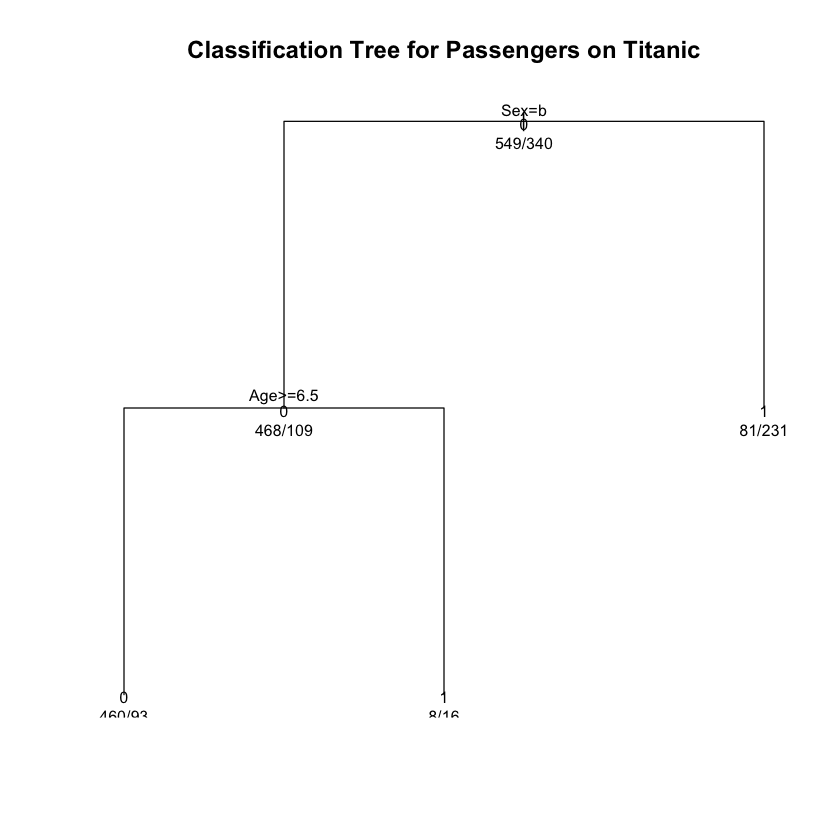

In [38]:
plot(fit, uniform=TRUE, main="Classification Tree for Passengers on Titanic")
text(fit, use.n=TRUE, all=TRUE, cex=.8)